In [37]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict

In [38]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#E69F00",
    "Stouffer":"#D44400",
    "REM":"#009E73",
    "RankProd":"#2E5EAA"
})

# Read results

In [39]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/"

dfs = {}

workdir = root_dir + "01_smaller_lib_balanced_PG_MajorPG/results" 
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["TMT_Balanced"] = df

# workdir = root_dir + "imbalanced/results"
# df = fp_eval.read_results(workdir,
#                           deqms_name="/central_res.tsv",
#                           fedprot_name="/DPE.csv")
# dfs["Imbalanced"] = df


print(dfs["TMT_Balanced"].shape)
dfs["TMT_Balanced"].head(4)

Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_balanced_PG_MajorPG/results with 325 genes. Adj.p-values were not log-transformed.


(325, 12)


,pv_DEqMS,lfc_DEqMS,pv_FedProt,lfc_FedProt,lfc_Fisher,pv_Fisher,lfc_REM,pv_REM,pv_Stouffer,lfc_Stouffer,pv_RankProd,lfc_RankProd
A0A075B6I9;P04211,2.586718e-05,0.553630,2.586718e-05,0.553630,0.554259,1.755835e-04,0.524931,0.000006,9.970694e-05,0.554259,0.000735,0.554259
A0A0B4J1U7,1.956621e-07,0.917442,1.956621e-07,0.917442,0.914337,2.184188e-07,0.861008,0.000310,1.255594e-07,0.914337,0.000004,0.914337
A0A0B4J1Y9,2.202280e-05,0.571404,2.202280e-05,0.571404,0.571009,1.008933e-04,0.536576,0.000002,4.960515e-05,0.571009,0.001203,0.571009
A0A0B4J2H0;A0A0C4DH29;P01742;P01743;P0DP01,1.406361e-03,0.446078,1.406361e-03,0.446078,0.443439,3.643371e-03,0.408477,0.000379,4.031189e-03,0.443439,0.020982,0.443439


# Deviations in the results of decentralized methods

First - for balanced.  
adj. p-val:
- min diff (supplementary)
- mean diff,
- max diff, 
- r, 
- rho

log2FC - same, for supplementary.
  




## stats tables

In [40]:
for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        dfs[dataset], 
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ", "RMSE", "NRMSE"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    logfc_basic_stats = fp_eval.calc_stats(
        dfs[dataset],
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ", "RMSE", "NRMSE"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="lfc_",
        top_genes=-1
    )

    # save to file, dataset to lower case
    dataset = dataset.lower()
    # pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/pval_basic_stats.csv')
    # logfc_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/logfc_basic_stats.csv')

    print(f'Dataset: {dataset}')
    # print("\tLogFC basic stats:")
    # print(logfc_basic_stats)
    print("\tP-value basic stats:")
    print(pval_basic_stats)        

Calculating RMSE. Using p-vals - not log-transformed.
RMSE and NRMSE computed for all genes from pv_ columns.
Calculating corrs. Using p-vals - not log-transformed.
Correlations computed for all genes from pv_ columns.
RMSE and NRMSE computed for all genes from lfc_ columns.
Correlations computed for all genes from lfc_ columns.


Dataset: tmt_balanced
	P-value basic stats:
               MinDiff      MeanDiff       MaxDiff         r         ρ  \
FedProt   0.000000e+00  3.743879e-14  5.142553e-13  1.000000  1.000000   
Fisher    8.629119e-10  1.250570e-01  9.318242e-01  0.732103  0.909934   
Stouffer  1.427968e-10  1.953377e-01  8.885049e-01  0.577066  0.866280   
REM       1.522524e-10  7.634208e-02  5.116510e-01  0.923908  0.953335   
RankProd  5.134376e-08  1.623566e-01  6.715249e-01  0.744676  0.823111   

                  RMSE         NRMSE  
FedProt   8.026793e-14  8.046862e-13  
Fisher    2.183085e-01  2.188543e+00  
Stouffer  3.061293e-01  3.068947e+00  
REM       1.361618e-01  1.365023e+00  
RankProd  2.163695e-01  2.169105e+00  


In [19]:
for dataset in dfs:
    transfomed_dataset = dfs[dataset].copy()
    
    # transform p-values to -log10 pv_ + column["FedProt", "Fisher", "Stouffer", "REM", "RankProd"]
    # there is no function in the evaluation_utils for this, so we will do it manually
    for method in ["DEqMS", "FedProt", "Fisher", "Stouffer", "REM", "RankProd"]:
        # first replace zeros with smallest non-zero value (offset)
        offset = transfomed_dataset[f"pv_{method}"].replace(0, np.nan).min()
        transfomed_dataset[f"pv_{method}"] = transfomed_dataset[f"pv_{method}"].replace(0, offset)        
        transfomed_dataset[f"pv_{method}"] = -np.log10(transfomed_dataset[f"pv_{method}"])

    pval_basic_stats = fp_eval.calc_stats(
        transfomed_dataset, 
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=[ "MeanDiff", "MaxDiff", "r", "ρ", "RMSE", "NRMSE"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    # save to file, dataset to lower case
    dataset = dataset.lower()
    # pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/log10pval_basic_stats.csv')
    
    print(f'Dataset: {dataset}')
    print("\tP-value basic stats:")
    # print round values to 3 digits
    print(pval_basic_stats.round(3))     
    print(pval_basic_stats)

Calculating RMSE. Using p-vals - log-transformed.
RMSE and NRMSE computed for all genes from pv_ columns.
Calculating corrs. Using p-vals - log-transformed.


Correlations computed for all genes from pv_ columns.


Dataset: tmt_balanced
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ   RMSE  NRMSE
FedProt      0.000    0.000  1.000  1.000  0.000  0.000
Fisher       0.491    2.213  0.967  0.910  0.601  0.150
Stouffer     0.569    1.694  0.966  0.869  0.659  0.164
REM          0.605    8.263  0.895  0.954  1.135  0.283
RankProd     1.199    6.967  0.744  0.824  1.791  0.446
          MeanDiff   MaxDiff         r         ρ      RMSE     NRMSE
FedProt   0.000007  0.000407  1.000000  1.000000  0.000033  0.000008
Fisher    0.490760  2.213244  0.966970  0.910131  0.601400  0.149821
Stouffer  0.568913  1.694041  0.965778  0.868816  0.659243  0.164230
REM       0.605168  8.262826  0.894716  0.953950  1.135451  0.282863
RankProd  1.199052  6.966939  0.744167  0.823557  1.790786  0.446120


### correlation plots

Plotting corrs using p-vals - log-transformed.


TMT_Balanced                        
                    r         ρ          RMSE
FedProt      1.000000  1.000000  2.100552e-13
Fisher       0.967060  0.910763  6.005088e-01
Stouffer     0.965705  0.867510  6.584570e-01
REM          0.894869  0.953764  1.133729e+00
RankProd     0.744664  0.824501  1.788096e+00

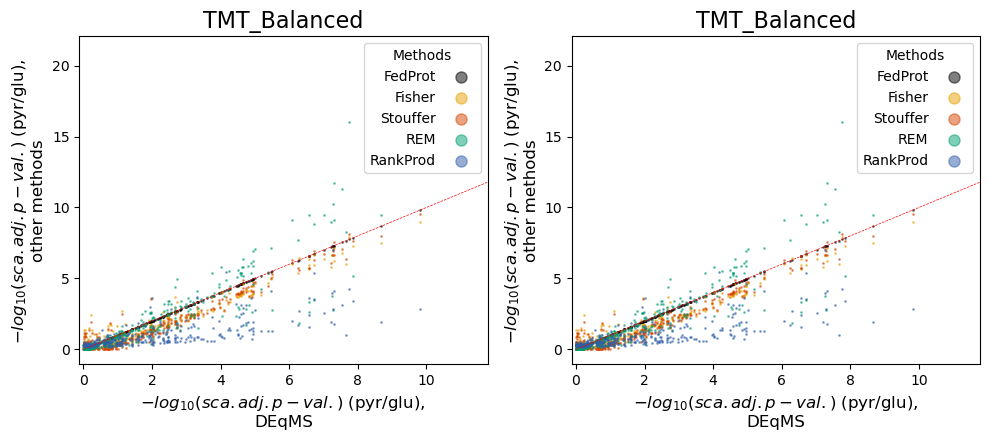

In [32]:
# log transform p-values in dfs, but first replace 0 with tiny value
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df

fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["TMT_Balanced", "TMT_Balanced"],
    add_table=False
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using p-vals - log-transformed.


TMT_Balanced                        
                    r         ρ          RMSE
FedProt      1.000000  1.000000  2.100552e-13
Fisher       0.967060  0.910763  6.005088e-01
Stouffer     0.965705  0.867510  6.584570e-01
REM          0.894869  0.953764  1.133729e+00
RankProd     0.744664  0.824501  1.788096e+00

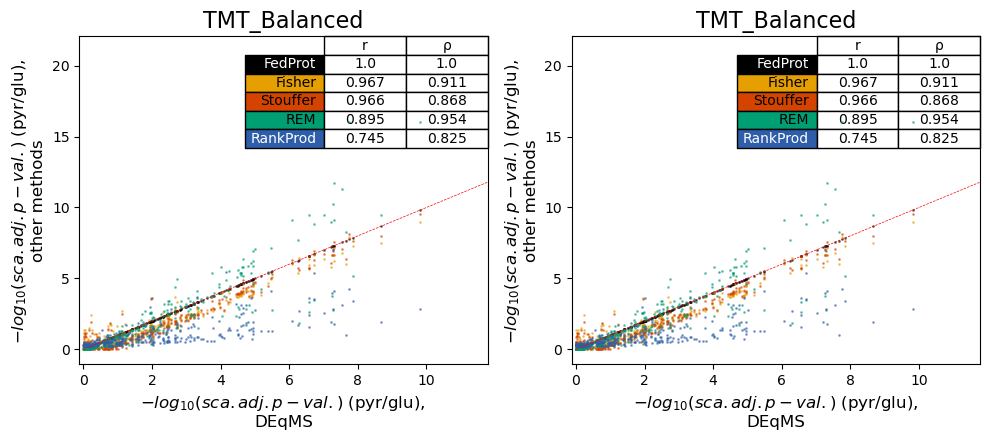

In [34]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["TMT_Balanced", "TMT_Balanced"],
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using p-vals - log-transformed.


Balanced                         Imbalanced                        
                 r         ρ          RMSE          r         ρ          RMSE
FedProt   1.000000  1.000000  9.412256e-13   1.000000  1.000000  6.227555e-13
Fisher    0.980614  0.956601  6.498508e+00   0.974887  0.945949  4.834297e+00
Stouffer  0.988327  0.964964  5.625929e+00   0.983927  0.951537  3.747290e+00
REM       0.763494  0.905410  4.170858e+01   0.749587  0.897226  4.026268e+01
RankProd  0.771453  0.876050  2.500658e+01   0.770441  0.864332  1.594350e+01

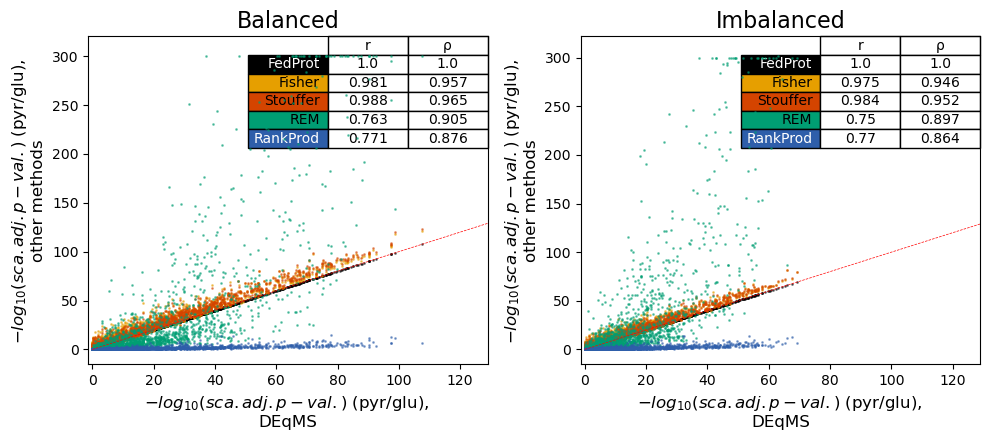

In [36]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["Balanced", "Imbalanced"],
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using logFC values.


TMT_Balanced                    
                    r         ρ      RMSE
FedProt      1.000000  1.000000  0.000002
Fisher       0.999899  0.999831  0.003807
Stouffer     0.999899  0.999831  0.003807
REM          0.996847  0.995671  0.023276
RankProd     0.999899  0.999831  0.003807

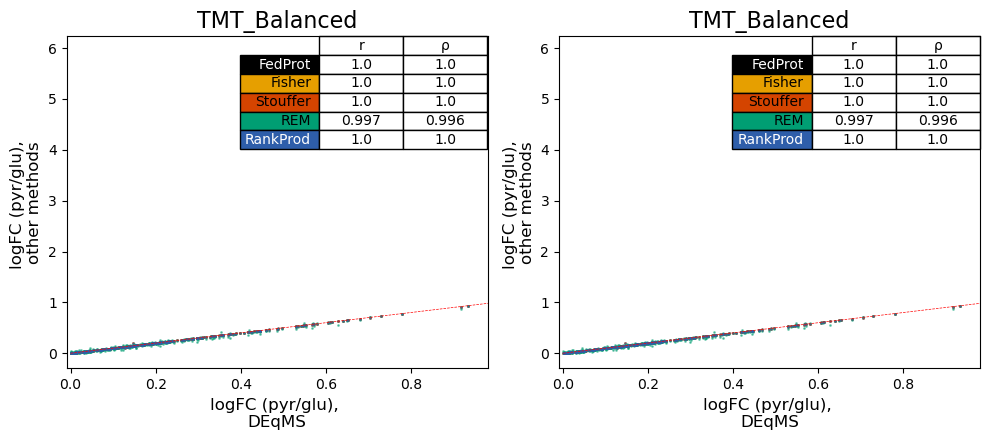

In [22]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=["TMT_Balanced", "TMT_Balanced"],
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

# The consistency of differentially expressed protein lists


In [23]:
# calculate FP, FN and F1

for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.6, adj_pval_thr=0.01,
        stats=["FP", "FN", "F1"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    print(f'Dataset: {dataset}')
    print("\tFP, FN and F1:")
    print(pval_basic_stats)

    dataset = dataset.lower()
    # pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/fp_fn_f1.csv')

Performance metrics calculated for all genes.


Dataset: TMT_Balanced
	FP, FN and F1:
           FP   FN        F1
FedProt   0.0  0.0  1.000000
Fisher    0.0  0.0  1.000000
Stouffer  0.0  0.0  1.000000
REM       0.0  2.0  0.916667
RankProd  0.0  0.0  1.000000


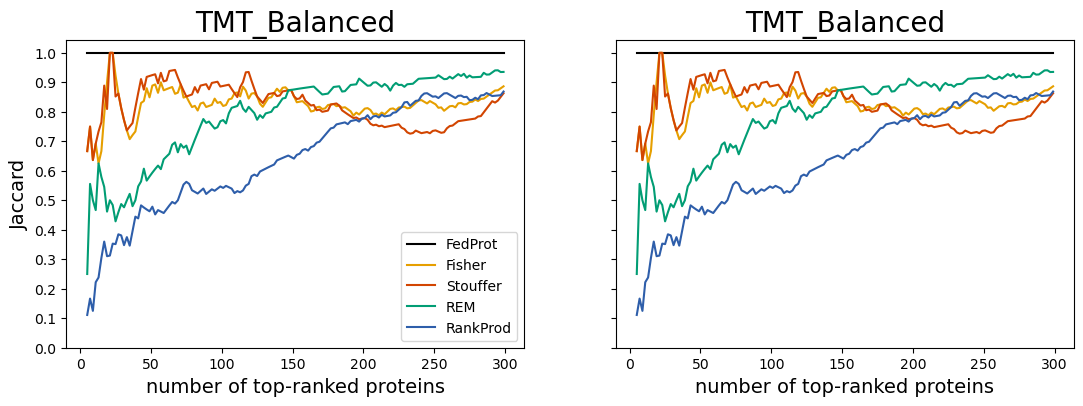

In [35]:
min_n_genes = 5
step = 2
max_n_genes = 300

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = ["TMT_Balanced", "TMT_Balanced"],
    methods=["FedProt", "Fisher","Stouffer","REM","RankProd"],
    metrics=["Jaccard"],
    min_n_genes=min_n_genes,
    max_n_genes=max_n_genes,
    step=step,
    color_dict=color_dict,
    sharey=True
    )

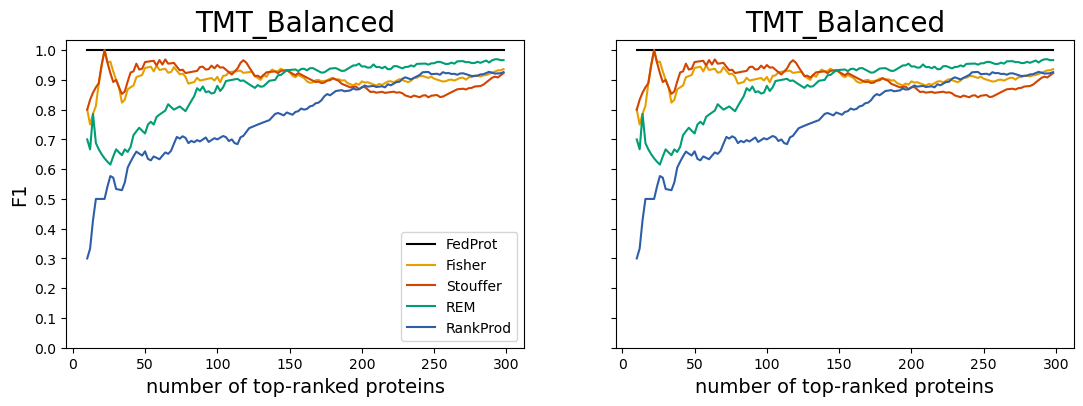

In [36]:
min_n_genes = 10
step = 2
max_n_genes = 300

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = ["TMT_Balanced", "TMT_Balanced"],
    methods=["FedProt", "Fisher","Stouffer","REM","RankProd"],
    metrics=["F1"],
    min_n_genes=min_n_genes,
    max_n_genes=max_n_genes,
    step=step,
    color_dict=color_dict,
    sharey=True
    )